This colab demonstrates use of TensorFlow Hub Module for Enhanced Super Resolution Generative Adversarial Network (*by Xintao Wang et.al.*) [[Paper](https://arxiv.org/pdf/1809.00219.pdf)] [[Code](https://github.com/captain-pool/GSOC/)]

for image enhancing. *(Preferrably bicubically downsampled images).*

Model trained on DIV2K Dataset (on bicubically downsampled images) on image patches of size 128 x 128.

In [ ]:
!pip install tensorflow matplotlib opencv-python
!pip install tensorflow-hub

**Preparing Environment**

In [21]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [22]:
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png

--2024-11-25 12:57:39--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0.006s  

2024-11-25 12:57:39 (5.08 MB/s) - ‘original.png’ saved [34146/34146]



In [20]:
# Declaring Constants
IMAGE_PATH = "original.png"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

**Defining Helper Functions**

In [6]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [7]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

#### Performing Super Resolution of images loaded from path

In [23]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as Original Image.jpg


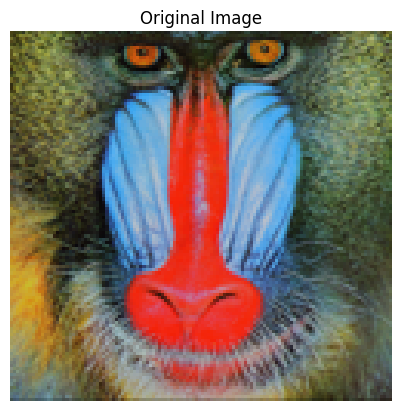

In [24]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [10]:
model = hub.load(SAVED_MODEL_PATH)

In [25]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 3.262030


Saved as Super Resolution.jpg


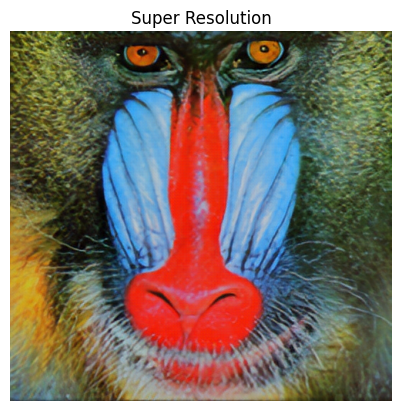

In [26]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")

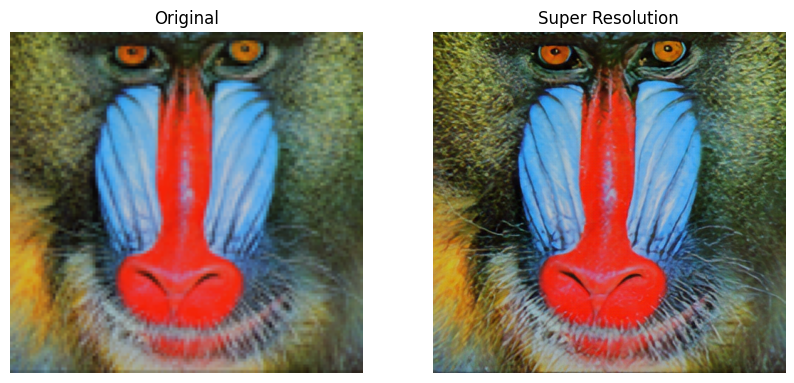

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np

def plot_images_side_by_side(original_image, super_res_image, titles=("Original", "Super Resolution")):
    """
    Plots two images side by side for comparison.

    Args:
        original_image: 3D image tensor. [height, width, channels].
        super_res_image: 3D image tensor. [height, width, channels].
        titles: Tuple of titles for the images.
    """
    # Convert tensors to uint8 numpy arrays for plotting
    original_image = tf.clip_by_value(original_image, 0, 255)
    original_image = Image.fromarray(tf.cast(original_image, tf.uint8).numpy())

    super_res_image = tf.clip_by_value(super_res_image, 0, 255)
    super_res_image = Image.fromarray(tf.cast(super_res_image, tf.uint8).numpy())

    # Create a subplot for side-by-side display
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title(titles[0])
    plt.axis("off")

    # Plot super-resolution image
    plt.subplot(1, 2, 2)
    plt.imshow(super_res_image)
    plt.title(titles[1])
    plt.axis("off")

    plt.show()

# Example usage:
# Assuming `hr_image` is the preprocessed original image tensor
# and `fake_image` is the super-resolution output tensor
plot_images_side_by_side(tf.squeeze(hr_image), tf.squeeze(fake_image))
